Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


W0903 07:50:38.052280 140106868156288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 07:50:38.088151 140106868156288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 07:50:38.096980 140106868156288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 07:50:38.220497 140106868156288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0903 07:50:38.230474 

Train Matrix Shape: (60000, 784)
Test Matrix Shape: (10000, 784)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Shape Before Encoding: (60000,)
Shape After one hot encoding: (60000, 10)


W0903 07:50:38.288152 140106868156288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0903 07:50:38.316319 140106868156288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0903 07:50:38.441288 140106868156288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.2442 - acc: 0.9262 - val_loss: 0.1075 - val_acc: 0.9667
Epoch 2/20
 - 9s - loss: 0.1009 - acc: 0.9683 - val_loss: 0.0778 - val_acc: 0.9744
Epoch 3/20
 - 9s - loss: 0.0707 - acc: 0.9778 - val_loss: 0.0771 - val_acc: 0.9765
Epoch 4/20
 - 9s - loss: 0.0541 - acc: 0.9828 - val_loss: 0.0711 - val_acc: 0.9787
Epoch 5/20
 - 9s - loss: 0.0442 - acc: 0.9858 - val_loss: 0.0617 - val_acc: 0.9819
Epoch 6/20
 - 9s - loss: 0.0406 - acc: 0.9866 - val_loss: 0.0644 - val_acc: 0.9799
Epoch 7/20
 - 9s - loss: 0.0352 - acc: 0.9881 - val_loss: 0.0699 - val_acc: 0.9790
Epoch 8/20
 - 9s - loss: 0.0288 - acc: 0.9902 - val_loss: 0.0605 - val_acc: 0.9836
Epoch 9/20
 - 9s - loss: 0.0272 - acc: 0.9910 - val_loss: 0.0673 - val_acc: 0.9807
Epoch 10/20
 - 9s - loss: 0.0274 - acc: 0.9909 - val_loss: 0.0740 - val_acc: 0.9816
Epoch 11/20
 - 9s - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0723 - val_acc: 0.9827
Epoch 12/20
 - 9s - loss: 0.0208 - 

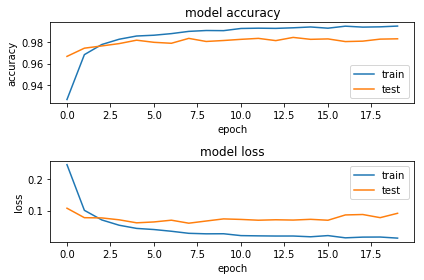

In [1]:
# Imported the libraries

import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Getting the Dataset

(X_train,y_train), (X_test,y_test) = mnist.load_data()

# Plotting the initial 9 digits

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
fig

# Plottinig the Pixel Value of the Image
fig2 = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap = 'gray')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title('Pixel Value Distribution')
plt.show()
fig2

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

print('Train Matrix Shape:', X_train.shape)
print('Test Matrix Shape:', X_test.shape)

print(np.unique(y_train, return_counts = True))

print("Shape Before Encoding:", y_train.shape)

y_test = np_utils.to_categorical(y_test, 10)
y_train = np_utils.to_categorical(y_train, 10)

print('Shape After one hot encoding:', y_train.shape)

model = Sequential()

model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 2, validation_data = (X_test, y_test))

model_name = 'keras_mnist.h5'
model.save(model_name, overwrite = True)

fig3 = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')

plt.tight_layout()
plt.show()
fig3


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
cd My\ Drive

/gdrive/My Drive


In [4]:
cd Colab\ Notebooks

/gdrive/My Drive/Colab Notebooks


In [5]:
from keras.preprocessing import image
from tqdm import tqdm
import cv2
X_train = []
for i in tqdm(range(1,6)):
  img = image.load_img('numbers/' + str(i) + '.png',target_size = (28,28,3))
  img = image.img_to_array(img)
  img = img/255
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = np.asarray(img)
  img = img.reshape(1,784)
  X_train.append(img)
  
X_train = np.asarray(X_train)

100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


In [6]:
print(X_train.shape)
X_train.reshape(5,1,784)

(5, 1, 784)


array([[[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ]],

       [[0.3019608, 0.3019608, 0.3019608, ..., 0.3019608, 0.3019608,
         0.3019608]],

       [[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ]],

       [[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ]],

       [[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]]], dtype=float32)

In [0]:
def val(pred):
  m = np.max(pred)
  for i in range(10):
    if m == pred[0,i]:
      return i

In [8]:
for i in X_train:
  pred = model.predict(i)
  print(val(pred))

5
2
5
5
6


In [0]:
model.save('mnist.h5',overwrite = True)